In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
from ts_plot_utils import compile_results, plot_stripplot2, plot_recovery_barplot2, plot_random_stripplot
from ts_plot_utils import plot_random_recovery_barplot
from ts_plot_utils import plot_iteration_stripplot2, plot_iteration_barplot, compile_iteration_data
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
combo_df = compile_results("benchmark_data/ts_replicate_quinazoline*.csv","benchmark_data/quinazoline_exhaustive.csv")

In [4]:
combo_df.cycle = pd.Categorical(combo_df.cycle,
                               categories=["1","2","3","4","5","6","7","8","9","10","concat","ref"],ordered=True)

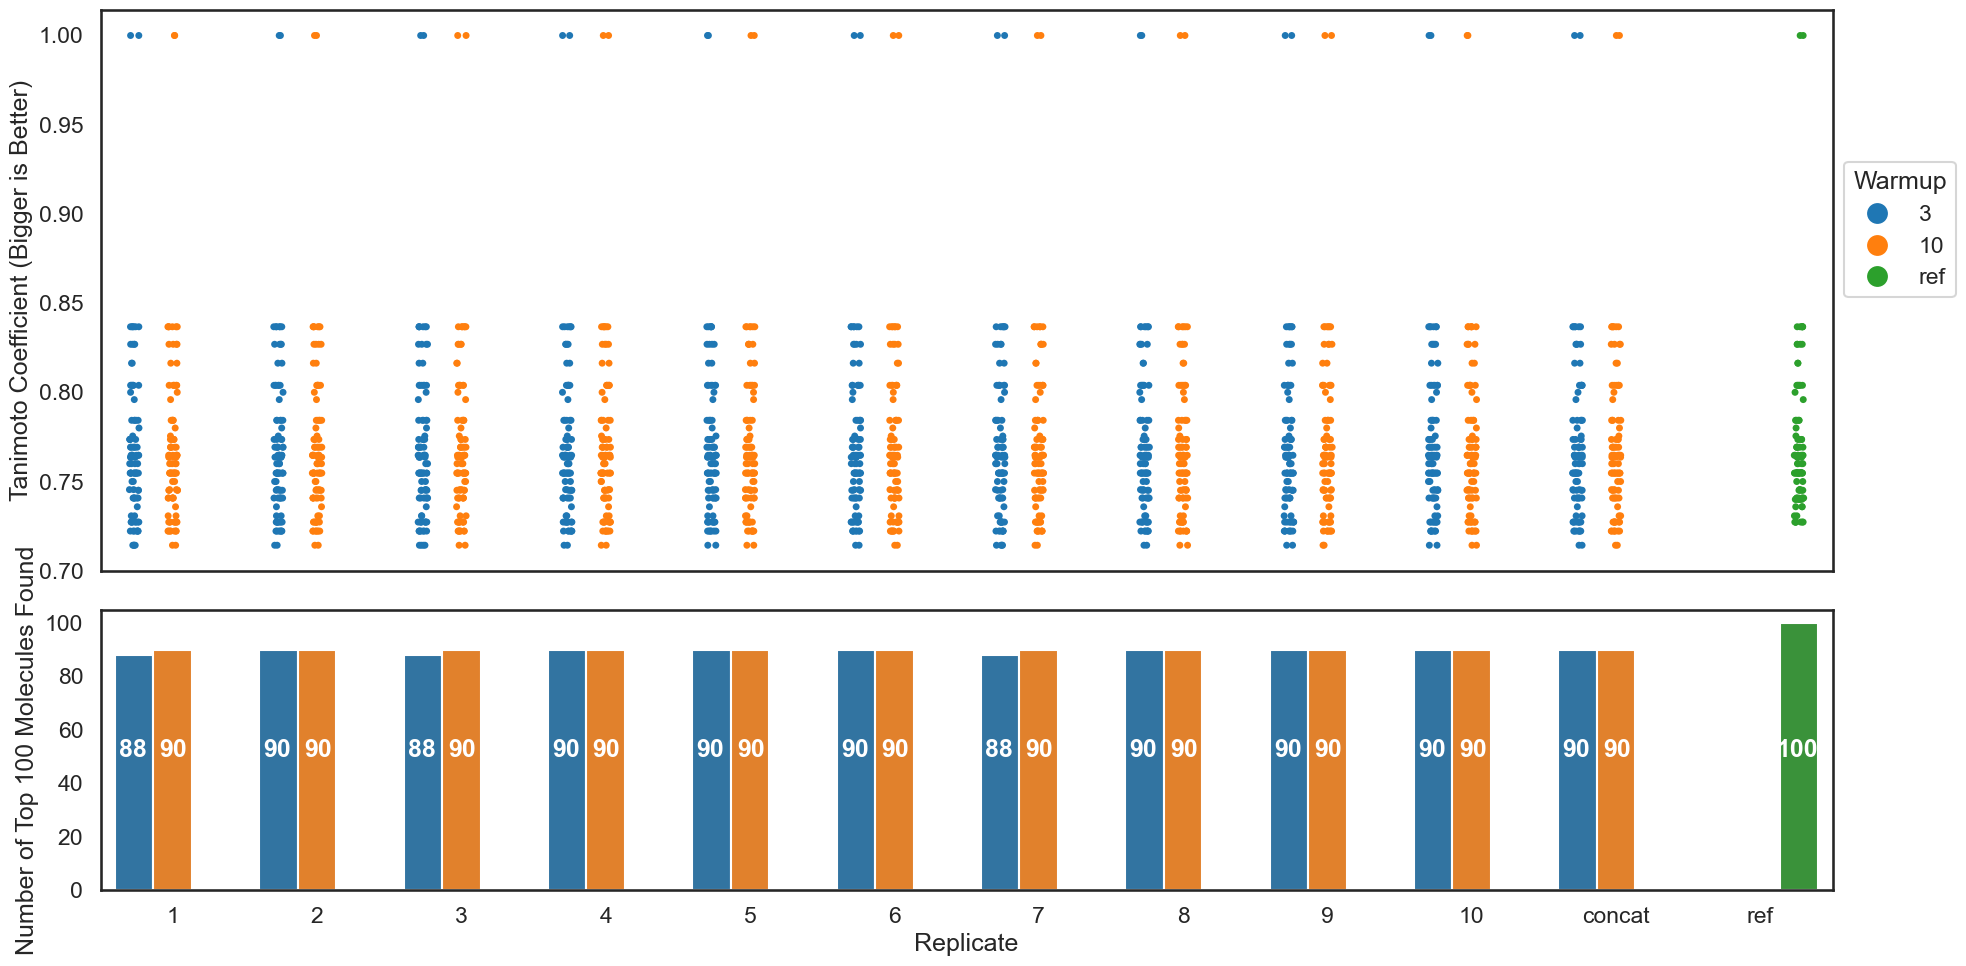

In [12]:
sns.set_style('white')
sns.set_context('talk')
figure, axes = plt.subplots(2,1,figsize=(20,10),gridspec_kw={'height_ratios': [2, 1]})
plot_stripplot2(combo_df, include_ref=True,ax=axes[0])
tmp_df = plot_recovery_barplot2(combo_df,ax=axes[1],xlabel="Replicate")
plt.tight_layout()

In [13]:
iteration_combo_df = compile_iteration_data("benchmark_data/ts_warmup_quinazoline*_iterations_*.csv","benchmark_data/quinazoline_exhaustive.csv")
iteration_combo_df.cycle = iteration_combo_df.iterations

In [14]:
iteration_combo_df

,score,SMILES,warmup,iterations,cycle
0,1.000000,CCc1cccc2c(=O)n(C3CNC3)c([C@@H](C)N)nc12,10,10000,10000
1,1.000000,CCc1cccc2c(=O)n(C3CNC3)c([C@H](C)N)nc12,10,10000,10000
12,0.836735,CCc1cccc2c(=O)n(C3CNC3)c([C@H](N)[C@@H](C)N)nc12,10,10000,10000
2000,0.836735,CCc1cccc2c(=O)n(C3CNC(=O)NC3)c([C@@H](C)N)nc12,10,10000,10000
20,0.836735,CCc1cccc2c(=O)n(C3CNC3)c([C@H](N)[C@H](C)N)nc12,10,10000,10000
...,...,...,...,...,...
95,0.727273,CCc1cccc2c(=O)n(C3CNC3)c([C@H](C)NC(=N)N)nc12,ref,ref,ref
96,0.727273,CCc1cccc2c(=O)n(C3CNC3)c([C@@H](N)[C@@H]3CCNC3...,ref,ref,ref
97,0.727273,CCc1cccc2c(=O)n([C@@H]3CNC[C@H]3OC)c([C@H](C)N...,ref,ref,ref
98,0.727273,CCc1cccc2c(=O)n([C@@H]3CNC[C@H]3OC)c([C@@H](C)...,ref,ref,ref


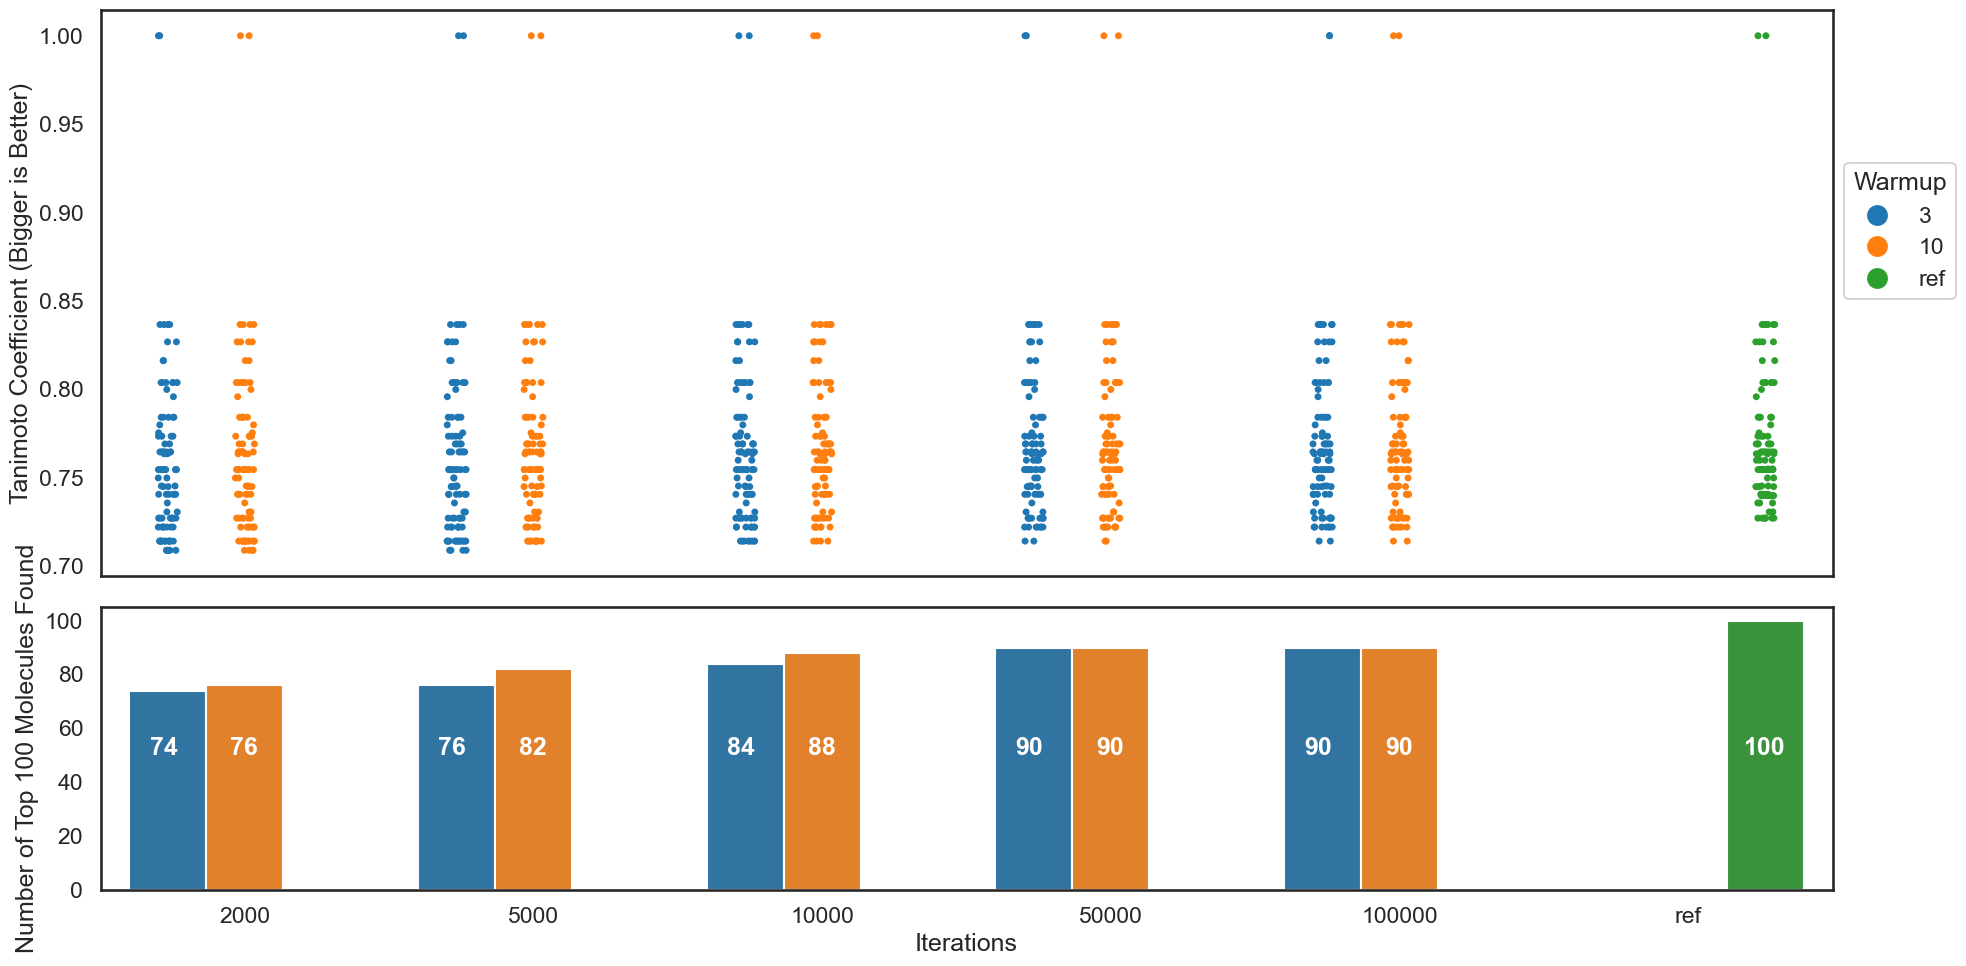

In [15]:
sns.set_style('white')
sns.set_context('talk')
figure, axes = plt.subplots(2,1,figsize=(20,10),gridspec_kw={'height_ratios': [2, 1]})
plot_iteration_stripplot2(iteration_combo_df, include_ref=True,ax=axes[0])
iteration_match_df = plot_iteration_barplot(iteration_combo_df,ax=axes[1],xlabel="Iterations")
plt.tight_layout()

In [16]:
from glob import glob
import re

In [ ]:
sns.set_style('white')
sns.set_context('talk')
figure, axes = plt.subplots(2,1,figsize=(20,10),gridspec_kw={'height_ratios': [2, 1]})
ref_filespec = "benchmark_data/quinazoline_exhaustive.csv"
random_filespec = "benchmark_data/ts_random*.csv"
ts_filespec = "benchmark_data/ts_replicate_quinazoline_*_warmup_10.csv"
random_combo_df = plot_random_stripplot(ref_filespec, random_filespec, ts_filespec,ax=axes[0])
plot_random_recovery_barplot(random_combo_df,ax=axes[1])